In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

def plot_density(samples, hbins=30, sample_range=[0,1]):
    hbins = 30
    counts, bin_edges = np.histogram(samples, bins=hbins, range=sample_range)
    bin_width = bin_edges[1] - bin_edges[0]
    density = (counts / n) / bin_width
    plt.bar(bin_edges[:-1] + bin_width/2, density, width=bin_width*.8);
    return plt.gca(), bin_edges  # ax

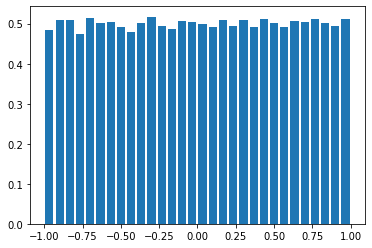

In [8]:
n = 100_000
xs = np.random.uniform(low=-1, high=1, size=n)
plot_density(xs, sample_range=[-1,1]);

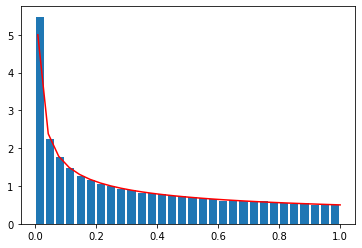

In [9]:
ys = xs ** 2
ax, be = plot_density(ys, sample_range=[0,1]);
ygrid = np.linspace(0.01, 1, 30)
pdf_y = 1 / (2*np.sqrt(ygrid))
ax.plot(ygrid, pdf_y, 'r-');

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


xs = np.linspace(-1,1,100)
a = -1
b = 1
px = 1/(b-a) * np.ones(len(xs))

fn = lambda x: x**2
ys = fn(xs)

#analytic
ppy = 1 / (2*np.sqrt(ys))

#monte carlo
n = 100000
np.random.seed(42)
samples = np.random.uniform(a,b, size=n)
samples2 = fn(samples)

print(np.mean(samples2))
print('theoretical mean = ', 1./3.)

0.33256088217659713
theoretical mean =  0.3333333333333333


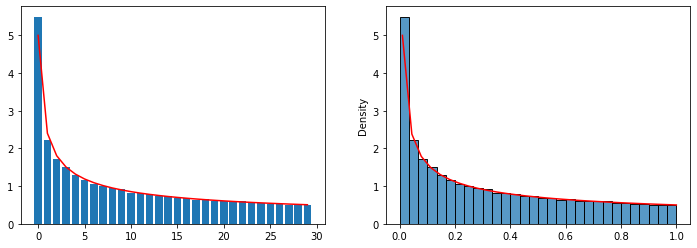

In [11]:
bins=30
counts, edges = np.histogram(samples2, bins=bins, range=[0,1])
dx = edges[1]-edges[0]
density = (counts / n) / dx

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].bar(range(bins), density)  # density plot
axes[0].plot(range(bins), .5 / np.sqrt(edges[:-1] + .01), 'r-')  # theoretical density at bin edges

sns.histplot(samples2, kde=False, stat='density', ax=axes[1], bins=bins)
x = np.linspace(.01, 1, bins)
axes[1].plot(x, .5 / np.sqrt(x), 'r-');

C:\Users\VIP\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

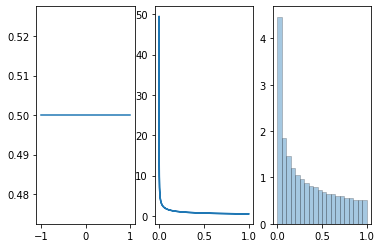

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].plot(xs, px, "-")
ax[1].plot(ys, ppy, "-")
sns.distplot(samples2, kde=False, ax=ax[2], bins=20, norm_hist=True, hist_kws=dict(edgecolor="k", linewidth=0.5))

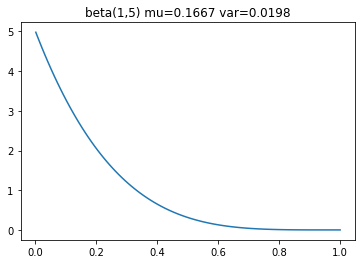

In [13]:
import scipy.stats as stats
x = np.linspace(0.001, 1, 100)
beta = stats.beta(1,5)
plt.plot(x, beta.pdf(x))
plt.title(f'beta(1,5) mu={np.round(beta.mean(),4)} var={np.round(beta.var(),4)}') ;

In [14]:
beta.mean()

0.16666666666666666

In [16]:
x = np.linspace(-4, 10, 1000)
p1 = stats.norm(0,1).pdf(x)
p2 = stats.norm(2.5,0.5).pdf(x)
p1.sum(), p2.sum()
p = 0.4 * p1 + 0.6 * p2

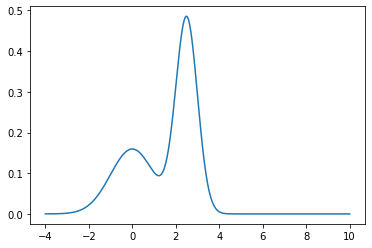

In [17]:
# plt.plot(x, p1)
# plt.plot(x, p2)
plt.plot(x, p);